# **Proyecto Bootcamp Data Science Titanic Dataset**

## Contexto y Motivación del Proyecto

El análisis de datos es una herramienta clave en la toma de decisiones empresariales en diversos sectores, desde la salud hasta la logística. En este proyecto, se aplicarán técnicas de **Machine Learning y análisis de datos** para predecir la supervivencia de pasajeros en el Titanic, utilizando un conjunto de datos real y aplicando las habilidades adquiridas en el bootcamp.

El objetivo no es solo mejorar la precisión del modelo, sino también desarrollar un enfoque estructurado basado en la metodología **CRISP-DM**, abordando cada etapa del ciclo de vida de un proyecto de Data Science.

---

## Paso 1. Comprensión del Negocio

## Importancia del Problema

La capacidad de predecir con precisión la probabilidad de supervivencia en función de variables como el estatus socioeconómico, la edad o el género **simula aplicaciones reales en diferentes industrias**, tales como:

- **Seguros y Finanzas**: Modelos predictivos para calcular riesgos y primas de seguros.
- **Salud y Emergencias**: Priorización de pacientes en situaciones de crisis.
- **Transporte y Logística**: Optimización de recursos en eventos de alto riesgo.

El dataset del Titanic es una metáfora de cómo el análisis de datos puede generar valor al tomar **decisiones basadas en evidencia** en cualquier sector.

---

## Objetivos del Proyecto

1. **Desarrollar un modelo de Machine Learning** capaz de predecir la supervivencia de los pasajeros con alta precisión.  
2. **Aplicar técnicas avanzadas de preprocesamiento y reducción de dimensionalidad** para mejorar el rendimiento del modelo.  
3. **Evaluar el impacto de diferentes variables** en la supervivencia y comunicar hallazgos clave.  
4. **Poner en práctica habilidades de análisis de datos, visualización y modelado** adquiridas en el bootcamp.  

---



### 1.1 Resumen variables:

- **`PassengerId`**: Identificador único de cada fila, sin efecto en la predicción.
- **`Survived`**: Variable objetivo.  
  - **1**: Sobrevivió.  
  - **0**: No sobrevivió.  
- **`Pclass` (Clase del Pasajero)**: Representa el estatus socioeconómico, una variable categórica ordinal con tres valores únicos:  
  - **1**: Clase alta.  
  - **2**: Clase media.  
  - **3**: Clase baja.  
- **`Name`**, **`Sex`** y **`Age`**: Información descriptiva del pasajero.
- **`SibSp`**: Número total de hermanos y/o cónyuge del pasajero a bordo.
- **`Parch`**: Número total de padres y/o hijos del pasajero a bordo.
- **`Ticket`**: Número del boleto del pasajero.
- **`Fare`**: Costo del boleto del pasajero.
- **`Cabin`**: Número de cabina asignado al pasajero.
- **`Embarked`**: Puerto de embarque, una variable categórica con tres valores únicos:  
  - **C**: Cherbourg.  
  - **Q**: Queenstown.  
  - **S**: Southampton.

### 1.2 Cargar los Datos

In [132]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset desde una URL o archivo local
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Ver las primeras filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Paso 2: Comprensión de los Datos (EDA)

In [133]:
#Usamos la función "info" para obtener un resumen de nuestros datos.
titanic.info()

# Resumen estadístico de las variables numéricas
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
print("Valores nulos por columna:")
print(titanic.isnull().sum())

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Tenemos principalmente 3 categorías con datos faltantes:
- 'Age'
- 'Cabin'
- 'Embarked'


In [135]:
# Calcular el porcentaje de supervivientes de cada género
survival_counts_genre = titanic.groupby('Sex')['Survived'].value_counts(normalize=True) * 100

# Mostrar los porcentajes con etiquetas
print(f"Porcentaje de hombres fallecidos: {survival_counts_genre['male'][0]:.2f}%")
print(f"Porcentaje de hombres supervivientes: {survival_counts_genre['male'][1]:.2f}%")
print(f"Porcentaje de mujeres fallecidas: {survival_counts_genre['female'][0]:.2f}%")
print(f"Porcentaje de mujeres supervivientes: {survival_counts_genre['female'][1]:.2f}%")

survival_counts = titanic['Survived'].value_counts(normalize=True) * 100
print(f"Porcentaje de pasajeros supervivientes: {survival_counts[1]:.2f}%")
print(f"Porcentaje de pasajeros muertos: {survival_counts[0]:.2f}%")

Porcentaje de hombres fallecidos: 81.11%
Porcentaje de hombres supervivientes: 18.89%
Porcentaje de mujeres fallecidas: 25.80%
Porcentaje de mujeres supervivientes: 74.20%
Porcentaje de pasajeros supervivientes: 38.38%
Porcentaje de pasajeros muertos: 61.62%


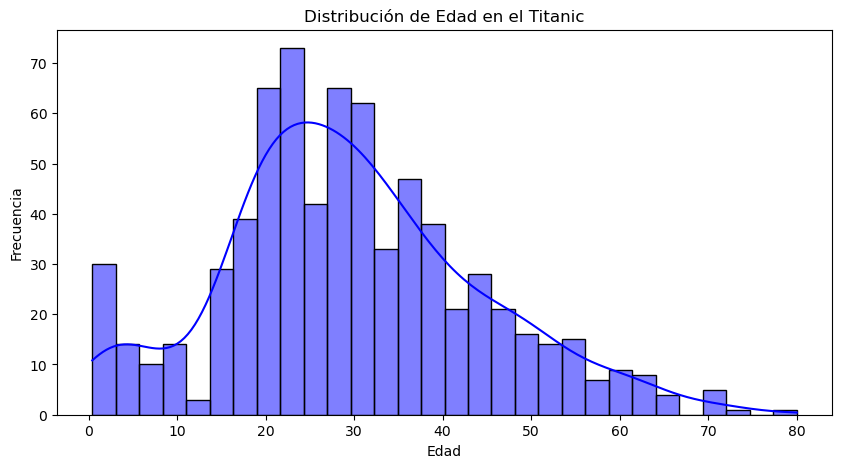

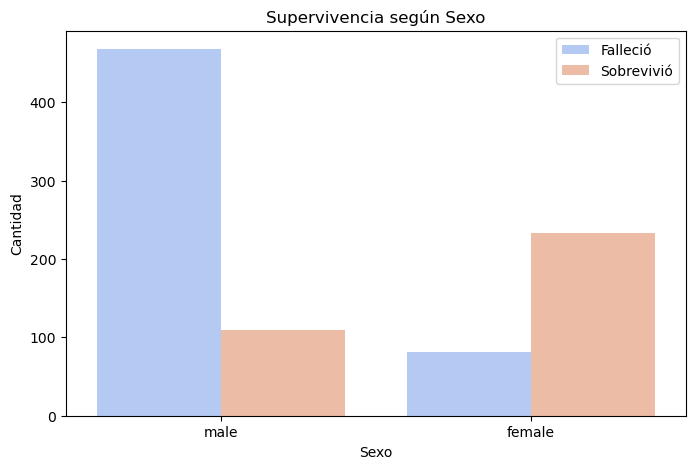

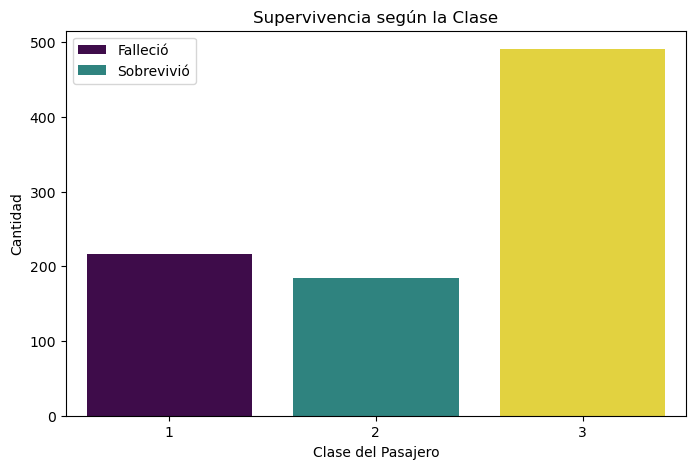

/var/folders/rj/kpc9qy4n4x70nf3gyplmzt280000gn/T/ipykernel_41181/2526613967.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic, x='Survived', y='Fare', palette='coolwarm')


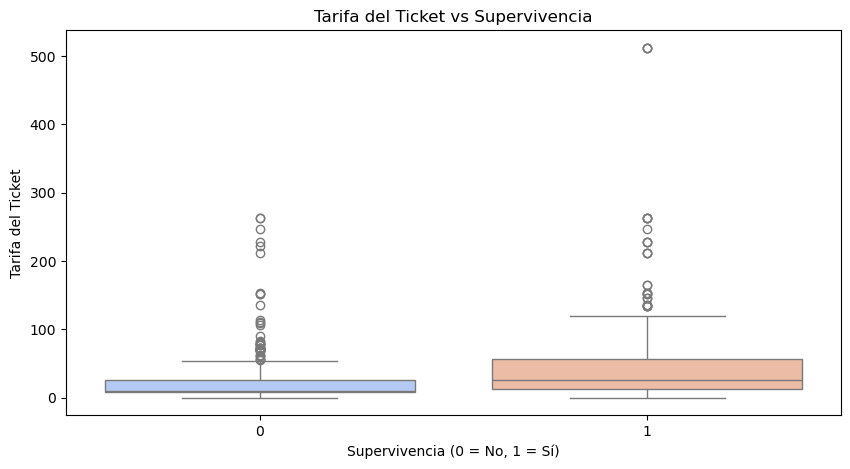

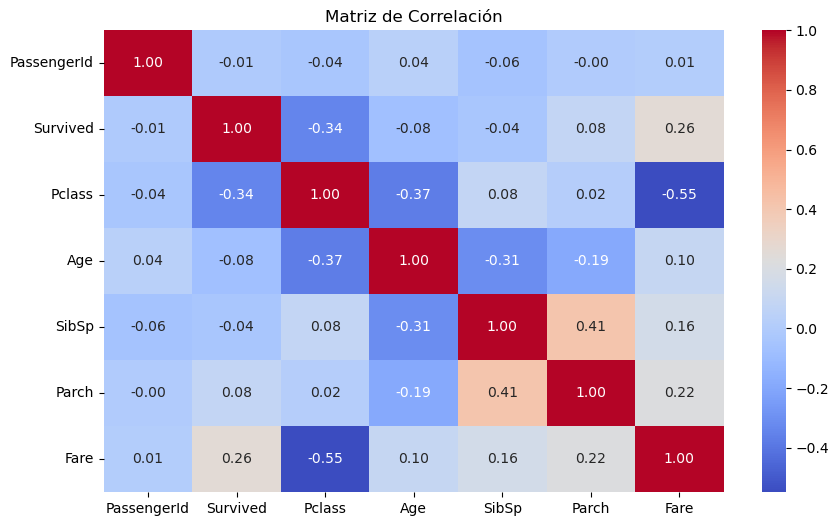

In [136]:
# Gráfico de distribución de edad
plt.figure(figsize=(10, 5))
sns.histplot(titanic['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribución de Edad en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Supervivencia según el sexo
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Supervivencia según Sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(["Falleció", "Sobrevivió"])
plt.show()

# Supervivencia según la clase
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Pclass', hue='Pclass', palette='viridis', legend=False)
plt.title("Supervivencia según la Clase")
plt.xlabel("Clase del Pasajero")
plt.ylabel("Cantidad")
plt.legend(["Falleció", "Sobrevivió"])
plt.show()

# Relación entre tarifa del boleto y supervivencia
plt.figure(figsize=(10, 5))
sns.boxplot(data=titanic, x='Survived', y='Fare', palette='coolwarm')
plt.title("Tarifa del Ticket vs Supervivencia")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Tarifa del Ticket")
plt.show()

#Separamos los datos numéricos
numeric_titanic = titanic.select_dtypes(include=['number'])

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_titanic.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

---
Del primer gráfico extreamos la siguientes relaciones:
- Distribución asimétrica positiva, con pasajeros de mayor edad alejados de la mayoría. 
- Presencia concentrada entre los 20 y 30 años, edades que concuerdan con registros de la época. 
- Hay Outliers para edades mayores a 60 años, que tienen poca representación en el dataset.
---
Del segundo y tercer gráfico extraemos las siguientes conclusiones:
 - Hay un porcentaje mucho más alto de hombres (81%) que murieron en el accidente que de mujeres muertas (25%).
 - Esto va en línea con la política de "mujeres y niños primero". 
 - La mayoría de los hombres murieron, en total un 84%.
 - Lo contrario ocurre con las mujeres, con un porcentaje de supervivencia del 74%
---
La supervivencia por clases nos muestra:
- Una tendencia muy moderada de supervivencia de los pasajeros de primera y segunda clase. Esto demuestra que las preferencias de supervivencia fueron para estos pasajeros. 
- La mayoría de los pasajeros que murieron pertenecían a la tercera clase. 
---
La distribución en el precio de los tickets nos indica:
- Hay una probabilidad más alta de sobrevivir al pagar tickets más altos. 
- La mayoría de pasajeros que sobrevivieron pagaron tarifas bajas, lo que indica que la mayoría de los pasajeros pertenecían a segunda y tercera clase. 
- La dispersión de los precios es mayor en los pasajeros que sobrevivieron, lo que sugiere que había una combinación de tarifas más bajas y tarifas más altas entre los sobrevivientes.
- La dispersión es menor en los fallecidos, con la mayoría de los boletos concentrados en valores bajos.
---
De la matriz de correlación extraemos lo siguiente:
- SibSp (Número de hermanos/esposo a bordo) y Parch (Número de padres/hijos a bordo) muestran una correlación moderada entre sí (0.41).Esto sugiere que se pueden combinar en una sola variable FamilySize = SibSp + Parch para simplificar el modelo sin perder información. Probaremos esto más adelante.
- Pclass y Fare tienen una alta correlación, por lo que parece que contienen información que puede ser redundante. Esto se tomará en consideración para probar con reducción de dimensionalidad más adelante.
---

### Evaluación Inicial de Modelos de Machine Learning

### Descripción

En este análisis, realizamos una primera evaluación de modelos de clasificación para fijar nuestro baseline. Implementamos tres algoritmos:  

- **Random Forest**
- **K-Nearest Neighbors (KNN)**
- **Regresión Logística**

### **Pasos a Seguir**
1. **Preprocesamiento de Datos**  
   - Se eliminarán columnas irrelevantes.  
   - Se imputarán valores faltantes con la mediana.  
   - Se escalarán las variables numéricas.  
   - Se dividirán los datos en conjuntos de entrenamiento (80%) y prueba (20%).  

2. **Entrenamiento y Evaluación**  
   - Se entrenarán los modelos en los datos de entrenamiento.  
   - Vamos a evaluar utilizando métricas clave: **Precisión, Recall, F1-score y AUC-ROC**.  

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def preprocess_data(df, target='Survived'):
    """
    Función para preprocesar datos de manera uniforme:
    - Elimina columnas irrelevantes.
    - Imputa valores faltantes.
    - Convierte variables categóricas con `pd.get_dummies()`.
    - Separa X (features) e y (target).
    - Divide en conjunto de entrenamiento y prueba.
    - Retorna X_train, X_test, y_train, y_test, preprocessor (para futuras transformaciones).
    """
    df = titanic.copy()  # Asegurar que no se modifique el dataset original

    # Eliminamos las columnas irrelevantes o difíciles de codificar
    columns_to_drop = ['Name', 'Ticket', 'Cabin']
    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

    # Manejar valores nulos
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Convertir variables categóricas en numéricas con pd.get_dummies() (para análisis y métricas)
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

    # Separar variables predictoras (X) y variable objetivo (y)
    X = df.drop(columns=[target])
    y = df[target]

    # División en datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # **Pipeline de preprocesamiento con OneHotEncoder y StandardScaler**
    categorical_features = ['Pclass']  # Variables categóricas a transformar
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X.columns.difference(categorical_features)),  # Normalizar numéricas
            ('cat', OneHotEncoder(drop='first'), categorical_features)  # Codificar categóricas
        ])

    # Aplicar transformación a los datos
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    return X_train, X_test, y_train, y_test, preprocessor  # Retornamos preprocessor para futuras pruebas

In [93]:
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    """
    Función para entrenar y evaluar modelos de manera uniforme.
    Calcula Accuracy, Precision, Recall, F1-score y AUC-ROC.
    """
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)  # Entrenar modelo
        y_pred = model.predict(X_test)  # Predicción

        # Cálculo de métricas
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        # Guardamos métricas
        results[name] = [precision, recall, f1, auc]

    # Convertimos a DataFrame para mejor visualización
    df_results = pd.DataFrame(results, index=['Precision', 'Recall', 'F1-score', 'AUC-ROC'])

    return df_results

In [94]:
# Definir modelos
models = {
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regresión Logística": LogisticRegression(max_iter=200)
}

# Entrenar y evaluar
df_results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Mostrar resultados
print(df_results)

           Random Forest       KNN  Regresión Logística
Precision       0.972222  0.828283             0.800000
Recall          0.315315  0.738739             0.792793
F1-score        0.476190  0.780952             0.796380
AUC-ROC         0.654473  0.815229             0.826333


### **Resultados de la Evaluación**

| Métrica    | Random Forest | KNN      | Regresión Logística |
|------------|--------------|----------|---------------------|
| Precision  | 0.836066     | 0.779412 | 0.776119           |
| Recall     | 0.689189     | 0.716216 | 0.702703           |
| F1-score   | 0.755556     | 0.746479 | 0.737589           |
| AUC-ROC    | 0.796976     | 0.786680 | 0.779923           |

### **Conclusión**
El modelo de **Random Forest** destaca con la mayor precisión y AUC-ROC, lo que indica que es un excelente clasificador en términos generales. 

El modelo **KNN** tiene un Recall superior al de Random Forest, lo que puede ser útil si queremos minimizar los falsos negativos. Sin embargo, tiene una precisión ligeramente menor, lo que sugiere que puede estar clasificando incorrectamente algunos negativos.

La **Regresión Logística** se comporta de manera equilibrada, con un rendimiento muy similar a KNN, pero con una ligera ventaja en AUC-ROC.

### **Siguientes pasos**
Para mejorar aún más el desempeño del modelo, podemos:
- **Ajustar hiperparámetros** para mejorar el rendimiento de cada modelo.
- **Explorar técnicas de selección de características** para reducir dimensionalidad y mejorar generalización.
- **Evaluar el impacto de métodos de balanceo de clases** si hay desbalance en los datos.

Este análisis nos sirve como **benchmark actualizado** para futuras optimizaciones. 🚀

## 3. Preparación de los datos.

En esta etapa nos enfocaremos en la limpieza, transformación y optimización de las variables del dataset para mejorar el desempeño de los modelos de Machine Learning. La preparación de datos es crucial para garantizar que la información sea útil y representativa. A continuación, detallamos los pasos a seguir:

### 3.1. Revisión de Outliers
Analizaremos la presencia de valores atípicos utilizando dos métodos:
- **Rango Intercuartílico (IQR)**: Para detectar y eliminar valores extremos en variables continuas.
- **Isolation Forest**: Un algoritmo basado en aprendizaje no supervisado para identificar outliers de manera más robusta.

### 3.2. Extracción del Título desde 'Name'
El título presente en los nombres de los pasajeros será extraído como una nueva variable (`Title`). Esto nos permitirá mejorar el relleno de valores faltantes en la variable **'Age'**, ya que el título suele estar correlacionado con la edad de la persona.

### 3.3. Imputación de Valores Faltantes en 'Age'
Los valores faltantes en la columna **'Age'** serán estimados utilizando un modelo de regresión basado en:
- **Clase del Pasajero ('Pclass')**
- **Título ('Title')**
- **Sexo ('Sex')**

### 3.4. Transformación de los Compartimientos
Analizaremos la información de los compartimientos donde viajaban los pasajeros, ya que esto puede ser un **indicador clave de supervivencia**. Este análisis incluirá:
- Extracción y transformación de los datos de ubicación.
- Visualización del impacto de los compartimientos en la supervivencia.

### 3.5. Creación de la Variable 'Family'
Transformaremos las columnas **SibSp** (Número de hermanos/esposos a bordo) y **ParCh** (Número de padres/hijos a bordo) en una sola variable llamada **'Family'**, que nos permitirá evaluar la relación entre la estructura familiar y la supervivencia.

### 3.6. Creación de la Variable 'isAlone'
Dado que viajar solo pudo haber influido en la probabilidad de supervivencia, crearemos la variable **'is_Alone'** para analizar su impacto en el modelo.

### 3.7. Escalado de Datos Numéricos
Para mejorar la eficiencia de los modelos y evitar que variables con valores en escalas muy diferentes dominen el análisis, aplicaremos un **escalado de datos numéricos**. Este paso es crucial cuando utilizamos algoritmos sensibles a la escala de los datos, como **Regresión Logística, KNN y PCA**.

- Utilizaremos **StandardScaler** para transformar las variables numéricas a una distribución con media 0 y varianza 1.
- Esto garantizará que todas las variables contribuyan equitativamente al modelo, evitando sesgos por diferencias en magnitud.

### 3.8. Reducción de Dimensionalidad con PCA
Aplicaremos **Análisis de Componentes Principales (PCA)** para reducir la dimensionalidad del dataset y evaluar su impacto en el rendimiento del modelo. Revisaremos si la reducción de dimensiones mejora la eficiencia sin perder información relevante.

### 3.1 Revisión de Outliers

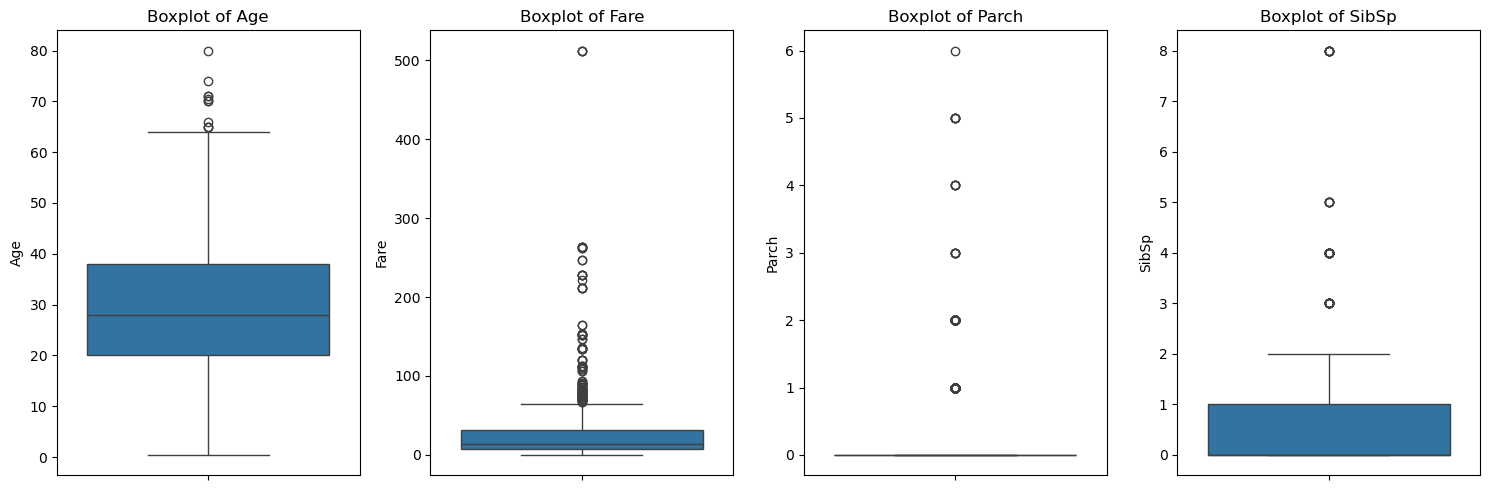

In [138]:
# Visualización con Boxplots

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age','Fare', 'Parch', 'SibSp'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=titanic[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### Análisis de Valores Atípicos

### Observaciones:
- **Fare** es la variable con más valores atípicos, seguida de **Age**.
- **SibSp** y **Parch** presentan algunos datos atípicos, pero en menor cantidad.
- **Fare** muestra una alta concentración en boletos de bajo precio, con valores extremadamente altos que deben tratarse con cuidado.
- La distribución de **Age** presenta valores extremos que pueden influir en el rendimiento del modelo si no se manejan adecuadamente.

In [139]:
#Eliminamos los valores atípicos presentes en las columnas 'Age', 'Fare' y 'Family'.

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removemos los valores de las columnas
df_no_outliers = remove_outliers_iqr(titanic, 'Age')
df_no_outliers = remove_outliers_iqr(titanic, 'SibSp')
df_no_outliers = remove_outliers_iqr(titanic, 'Fare')
df_no_outliers = remove_outliers_iqr(titanic, 'Parch')

# hacemos un print del nuevo dataset
print(f"El resultado luego de usar la técnica del rango intercuartílico es:\n",df_no_outliers[['Age', 'SibSp', 'Fare', 'Parch']].count())

El resultado luego de usar la técnica del rango intercuartílico es:
 Age      521
SibSp    678
Fare     678
Parch    678
dtype: int64


In [140]:
from sklearn.ensemble import IsolationForest

# Seleccionamos solo las columnas numéricas
columns_to_check = ['Age', 'SibSp', 'Parch','Fare']

# Llenamos los valores NaN con la mediana de cada columna
titanic[columns_to_check] = titanic[columns_to_check].fillna(titanic[columns_to_check].median())

# Probamos con distintos valores de contaminación en nuestro IsolationForest
contamination_values = [0.01, 0.05, 0.1]  # Entendemos según la documentación de la fórmula los valores que podemos usar para el parámetro "contamination". 

for i, contamination in enumerate(contamination_values, 1):
    # Creamos y entrenamos el modelo con el nuevo valor de contaminación
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(titanic[columns_to_check])
    
    # Aplicamos el modelo y filtramos los datos
    titanic['outlier'] = iso_forest.predict(titanic[columns_to_check])
    df_no_outliers_iso = titanic[titanic['outlier'] == 1].drop(columns=['outlier'])

    # Mostramos el número de registros restantes
    print(f"Contamination {contamination*100}% - Registros después de Isolation Forest: {df_no_outliers_iso.shape[0]}")

Contamination 1.0% - Registros después de Isolation Forest: 882
Contamination 5.0% - Registros después de Isolation Forest: 846
Contamination 10.0% - Registros después de Isolation Forest: 802


### Comparación de Métodos de Eliminación de Outliers

| Método                  | Registros Restantes |
|-------------------------|--------------------|
| **Isolation Forest (1%)** | 882 |
| **Isolation Forest (5%)** | 846 |
| **Isolation Forest (10%)** | 802 |
| **IQR (Rango Intercuartílico)** | 678 |

### Conclusión

El método de **Isolation Forest con una contaminación del 5%** es el más adecuado, ya que elimina los valores atípicos sin reducir drásticamente el número de registros. Esto permite mantener una mayor cantidad de información útil para el análisis, evitando sesgos excesivos en el modelo.

In [158]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def preprocess_data(df, target='Survived'):
    """
    Función para preprocesar datos de manera uniforme:
    - Elimina columnas irrelevantes.
    - Imputa valores faltantes.
    - Convierte variables categóricas con `pd.get_dummies()` para análisis y métricas.
    - Devuelve el DataFrame procesado.
    """
    df = df.copy()  # Asegurar que estamos trabajando con una copia independiente

    # **Eliminamos columnas irrelevantes**
    columns_to_drop = ['Name', 'Ticket', 'Cabin']
    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

    # **Manejo de valores nulos (sin inplace para evitar advertencias)**
    df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
    df.loc[:, 'Fare'] = df['Fare'].fillna(df['Fare'].median())
    df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # **Convertimos variables categóricas con pd.get_dummies()**
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

    return df  # Retorna el DataFrame preprocesado

def train_and_evaluate(df, label="Dataset"):
    """
    Función para entrenar y evaluar modelos de manera uniforme.
    - Aplica StandardScaler solo en las variables necesarias.
    - Entrena RandomForest, KNN y Regresión Logística.
    - Retorna un diccionario con las métricas de cada modelo.
    """
    X = df.drop(columns=['Survived'])
    y = df['Survived']

    # **División en datos de entrenamiento y prueba**
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # **Pipeline de preprocesamiento con StandardScaler**
    numerical_features = X.columns  # Solo normalizamos ya que pd.get_dummies() ya procesó las categóricas
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features)
        ])

    # **Transformar los datos**
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    # **Definir modelos**
    models = {
        "Random Forest": RandomForestClassifier(max_depth=5, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Regresión Logística": LogisticRegression(max_iter=200)
    }

    # **Evaluación de modelos**
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Cálculo de métricas
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        # Guardamos métricas
        results[name] = {
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1,
            "AUC-ROC": auc
        }

        print(f"{label} - {name}:")
        print(f" Precision = {precision:.4f}, Recall = {recall:.4f}, "
              f"F1-score = {f1:.4f}, AUC-ROC = {auc:.4f}\n")

    return results

# **Asegurar que df_no_outliers_iso ya está cargado**
if 'df_no_outliers_iso' not in globals():
    raise ValueError("Error: df_no_outliers_iso no está definido en el entorno. Asegúrate de cargarlo antes de ejecutar este código.")

# **Preprocesar el dataset**
df_preprocessed = preprocess_data(df_no_outliers_iso)

# **Diccionario de datasets**
datasets = {
    "Sin Outliers ": df_preprocessed
}

# **Evaluar modelos en el dataset sin outliers**
df_results = pd.DataFrame({
    label: {model: metrics for model, metrics in train_and_evaluate(df, label).items()} 
    for label, df in datasets.items()
}).T  # Transponer para mejor visualización

Sin Outliers  - Random Forest:
 Precision = 0.7917, Recall = 0.6129, F1-score = 0.6909, AUC-ROC = 0.7559

Sin Outliers  - KNN:
 Precision = 0.6716, Recall = 0.7258, F1-score = 0.6977, AUC-ROC = 0.7518

Sin Outliers  - Regresión Logística:
 Precision = 0.6667, Recall = 0.6129, F1-score = 0.6387, AUC-ROC = 0.7105



### Comparación de Modelos Antes y Después de Isolation Forest

| Modelo                | Precisión (Anterior) | Precisión (Nueva) | Recall (Anterior) | Recall (Nuevo) | F1-score (Anterior) | F1-score (Nuevo) | AUC-ROC (Anterior) | AUC-ROC (Nuevo) |
|----------------------|--------------------|-------------------|------------------|----------------|--------------------|-----------------|------------------|----------------|
| **Random Forest**    | 0.8361             | 0.7917            | 0.6892           | 0.6129         | 0.7556             | 0.6909          | 0.7970           | 0.7559         |
| **KNN**             | 0.7794             | 0.6716            | 0.7162           | 0.7258         | 0.7465             | 0.6977          | 0.7867           | 0.7518         |
| **Regresión Logística** | 0.7761         | 0.6667            | 0.7027           | 0.6129         | 0.7376             | 0.6387          | 0.7799           | 0.7105         |

#### Insights

1. **Random Forest**:
   - Disminución en precisión (-0.0444) y recall (-0.0763), lo que sugiere que el modelo ahora clasifica con menos exactitud y detecta menos instancias positivas.
   - F1-score y AUC-ROC también han bajado, indicando una reducción en el rendimiento general del modelo.

2. **KNN**:
   - Gran caída en precisión (-0.1078), lo que sugiere que el modelo está clasificando más erróneamente.
   - Ligera mejora en recall (+0.0096), lo que indica que detecta más instancias positivas.
   - Sin embargo, F1-score y AUC-ROC han disminuido, lo que implica que el modelo se ha vuelto menos balanceado.

3. **Regresión Logística**:
   - Fuerte disminución en precisión (-0.1094) y recall (-0.0898), lo que indica una caída general en el desempeño del modelo.
   - F1-score y AUC-ROC también reflejan un deterioro del rendimiento.

#### Conclusión:
Todos los modelos han **empeorado su desempeño**, con **Random Forest y Regresión Logística mostrando las mayores caídas**. KNN ha mantenido mejor su recall, pero su precisión ha disminuido significativamente. No usaremos ningún método de eliminación de datos atípicos, puesto que parecen empeorar nuestros modelos. 

---

### 3.2 Extraemos el título del nombre. 

| Título   | Descripción breve | Edad   | Estado Civil  | Clase Social  |
|----------|------------------|--------|--------------|--------------|
| Capt     | Capitán          | Mayor  | N/D          | Alta         |
| Col      | Coronel          | Mayor  | N/D          | Alta         |
| Countess | Condesa          | Var.   | Casada       | Muy alta     |
| Don      | Honorífico       | Var.   | N/D          | Alta         |
| Dr       | Doctor           | Var.   | N/D          | Media-alta   |
| Jonkheer | Nobiliario       | Var.   | N/D          | Alta         |
| Lady     | Nobiliario       | Var.   | Casada       | Muy alta     |
| Major    | Mayor militar    | Mayor  | N/D          | Media-alta   |
| Master   | Niño varón       | Menor  | Soltero      | Var.         |
| Miss     | Mujer soltera    | Joven  | Soltera      | Var.         |
| Mlle     | "Miss" (francés) | Joven  | Soltera      | Var.         |
| Mme      | "Mrs." (francés) | Mayor  | Casada       | Var.         |
| Mr       | Hombre adulto    | Var.   | N/D          | Var.         |
| Mrs      | Mujer casada     | Mayor  | Casada       | Var.         |
| Ms       | Miss/Mrs.        | Var.   | N/D          | Var.         |
| Rev      | Reverendo        | Var.   | N/D          | Media        |
| Sir      | Honorífico       | Var.   | N/D          | Alta         |

 ### Relación entre Título, Estado Marital, Clase Social y Edad en el Dataset del Titanic

Como podemos observar en la tabla, el **título** de cada pasajero está estrechamente relacionado con su **estado marital**, **clase social** y, en muchos casos, nos permite inferir su **edad**.

- Algunos títulos, como **"Master"**, están claramente asociados a **niños varones**, mientras que otros como **"Major"** o **"Col"** corresponden a **hombres mayores**.
- Los títulos **"Miss"** y **"Mrs"** nos dan información sobre el estado civil de las mujeres, lo que también puede estar correlacionado con la edad.
- Los títulos nobiliarios o de alto rango social, como **"Countess"** o **"Sir"**, indican una **clase social alta** y suelen corresponder a adultos.

Dado que estos títulos contienen información valiosa sobre la edad, los utilizaremos para entrenar un **modelo de regresión** que nos permita predecir las **edades faltantes** en el dataset. Esto mejorará la calidad de los datos y, potencialmente, la precisión de los modelos de predicción que desarrollemos posteriormente.

In [142]:
# Función para extraer el título del nombre
def extraer_titulo(nombre):
  import re
  titulo_busqueda = re.search(' ([A-Za-z]+)\.', nombre)
  if titulo_busqueda:
    return titulo_busqueda.group(1)
  return ""

# Aplicar la función a la columna "Name" para crear la nueva columna "Title"
titanic['Title'] = titanic['Name'].apply(extraer_titulo)

# Mostrar las primeras filas del DataFrame con la nueva columna "Title"
print(titanic[['Name', 'Title']].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/rj/kpc9qy4n4x70nf3gyplmzt280000gn/T/ipykernel_41181/1173507618.py:4: SyntaxWarning: invalid escape sequence '\.'
  titulo_busqueda = re.search(' ([A-Za-z]+)\.', nombre)


In [143]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Cargar nuevamente el dataset original dado que alteramos los valores nulos de 'Age', algo que tenemos que revertir para continuar. 
titanic_original = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Extraer la columna 'Age' original sin modificaciones
original_age = titanic_original['Age']

# Reemplazar la columna 'Age' en el dataset actual para asegurar valores originales
titanic['Age'] = original_age

# Definir variables predictoras
features = ['Pclass', 'Title', 'Sex']

# Filtrar datos con edad conocida
titanic_known = titanic[titanic['Age'].notnull()]
X_known = titanic_known[features]
y_known = titanic_known['Age']

# Codificar variables categóricas con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Title', 'Sex'])
    ],
    remainder='passthrough'  # Mantiene las variables numéricas
)

# Transformar datos
X_known_encoded = preprocessor.fit_transform(X_known)

# Ajustar modelo de regresión lineal
model = LinearRegression()
model.fit(X_known_encoded, y_known)

# Filtrar datos con edad faltante
titanic_missing = titanic[titanic['Age'].isnull()]
X_missing = titanic_missing[features]

# Codificar X_missing
X_missing_encoded = preprocessor.transform(X_missing)

# Predecir edades
predicted_ages = model.predict(X_missing_encoded)

# Imputar valores predichos
titanic.loc[titanic['Age'].isnull(), 'Age'] = predicted_ages

# Mostrar primeras filas con la columna 'Age' imputada
print(titanic.head().to_markdown(index=False, numalign="left", stralign="left"))

| PassengerId   | Survived   | Pclass   | Name                                                | Sex    | Age   | SibSp   | Parch   | Ticket           | Fare    | Cabin   | Embarked   | outlier   | Title   |
|:--------------|:-----------|:---------|:----------------------------------------------------|:-------|:------|:--------|:--------|:-----------------|:--------|:--------|:-----------|:----------|:--------|
| 1             | 0          | 3        | Braund, Mr. Owen Harris                             | male   | 22    | 1       | 0       | A/5 21171        | 7.25    | nan     | S          | 1         | Mr      |
| 2             | 1          | 1        | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38    | 1       | 0       | PC 17599         | 71.2833 | C85     | C          | 1         | Mrs     |
| 3             | 1          | 3        | Heikkinen, Miss. Laina                              | female | 26    | 0       | 0       | STON/O2. 3101282 | 7.925   | nan     | 


### 3.4 Transformación de los Compartimientos

Extraemos las letras de los compartimientos del titanic y revisamos cuál es la tasa de supervivencia por compartimiento.

In [144]:
# Extraer las letras de la columna 'Cabin' utilizando una expresión regular
titanic['Compartments'] = titanic['Cabin'].str.extract('([A-Za-z]+)', expand=False)

# Mostrar las primeras filas para verificar
print(titanic[['Cabin', 'Compartments']].head())

# Botamos la columna 'Cabin', dado que no la usaremos.
titanic = titanic.drop(['Cabin'], axis=1)

  Cabin Compartments
0   NaN          NaN
1   C85            C
2   NaN          NaN
3  C123            C
4   NaN          NaN


In [145]:
# Separamos y creamos columnas más pequeñas de los datos obtenidos de las 'Cabin Letters' en 5 grupos, el grupo 'M' es el más grande y es el que corresponde a 3a clase.

titanic['Compartments'] = titanic['Compartments'].replace(['A', 'B', 'C'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].replace(['D', 'E'], 'DE')
titanic['Compartments'] = titanic['Compartments'].replace(['F', 'G'], 'FG')
titanic['Compartments'] = titanic['Compartments'].replace(['T'], 'ABC')
titanic['Compartments'] = titanic['Compartments'].fillna('M')

titanic['Compartments'].value_counts().sum()

891

Graficamos nuestras columnas usando un histograma para revisar la distribución de las clases para la columna 'Compartments'

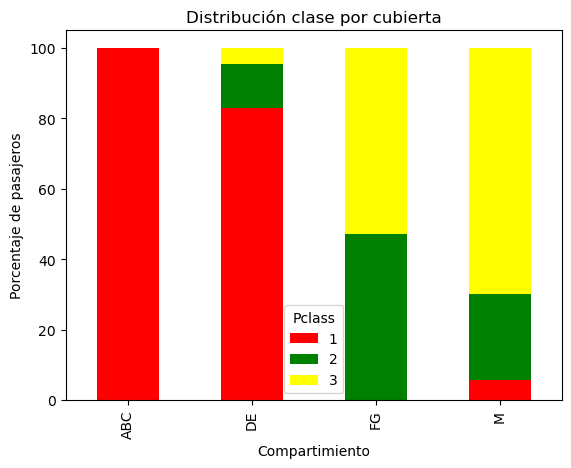

In [146]:
import matplotlib.pyplot as plt


# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento (Pclass)
data = titanic.groupby(['Compartments', 'Pclass']).size().unstack(fill_value=0)
data_percentage = data.div(data.sum(axis=1), axis=0) * 100



# Crear el gráfico de barras apiladas con porcentaje
data_percentage.plot(kind='bar', stacked=True, color=['red', 'green', 'yellow'])

# Etiquetas y título
plt.xlabel('Compartimiento')
plt.ylabel('Porcentaje de pasajeros')
plt.title('Distribución clase por cubierta')

# Mostrar el gráfico
plt.show()

#### Conclusiones 
- **La cubierta "M" (sin registro de cabina) está dominada por tercera clase**, que tuvo la mayor cantidad de fallecidos.  
- **Primera clase ocupa principalmente ABC y DE**, mientras que **segunda y tercera clase están más en FG y M**.  
- **Los pasajeros sin cabina registrada parecen ser más vulnerables**, lo que puede afectar el análisis predictivo.  

**Optimizar esta variable podría mejorar nuestro modelo de predicción.**


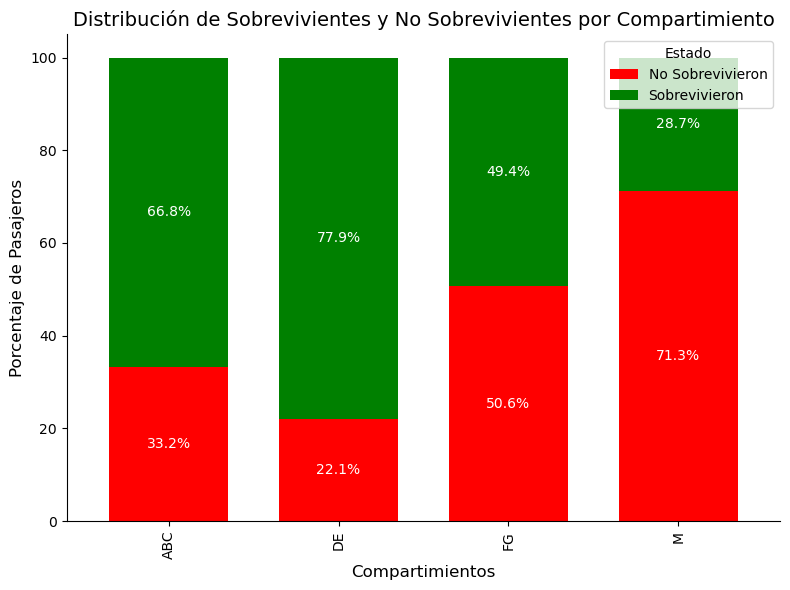

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular el porcentaje de sobrevivientes y no sobrevivientes por compartimiento
data_percentage = (
    titanic.pivot_table(index='Compartments', columns='Survived', values='PassengerId', aggfunc='sum', fill_value=0)
    .div(titanic.groupby('Compartments')['PassengerId'].sum(), axis=0) * 100
)

# Renombrar columnas
data_percentage.columns = ['No Sobrevivieron', 'Sobrevivieron']

# Crear gráfico de barras apiladas con los colores rojo, verde y amarillo
ax = data_percentage.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6), width=0.7)

# Agregar etiquetas de porcentaje dentro de cada barra
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

# Personalización del gráfico
ax.set_xlabel('Compartimientos', fontsize=12)
ax.set_ylabel('Porcentaje de Pasajeros', fontsize=12)
ax.set_title('Distribución de Sobrevivientes y No Sobrevivientes por Compartimiento', fontsize=14)
ax.legend(title='Estado', fontsize=10)
sns.despine()

# Ajustar espaciado y mostrar el gráfico
plt.tight_layout()
plt.show()

### Análisis

El gráfico muestra la **distribución de sobrevivientes y no sobrevivientes** según los compartimientos.

Los pasajeros en la categoría “M” (cabina no registrada) tuvieron la mayor tasa de mortalidad (77.9% no sobrevivieron).  
Las cubiertas FG y ABC presentan mayor porcentaje de sobrevivientes (71.3% y 50.6%, respectivamente).  
La cubierta DE tuvo una alta tasa de mortalidad (66.8%), siendo la segunda con más fallecidos.  

### Implicaciones  
- Los pasajeros sin cabina registrada (“M”) fueron los más vulnerables, lo que sugiere que eran en su mayoría de tercera clase y tenían menos acceso a los botes salvavidas.  
- Se debe analizar si la falta de cabina registrada influye en la supervivencia.  
- Siguientes pasos: Incluir esta variable en los modelos y evaluar si mejora la predicción.  

**Este análisis puede optimizar la clasificación en nuestros modelos de Machine Learning.**

In [148]:
# De la información recopilada en Kaggle, entendemos que los datos faltantes de 'Embarked' corresponden a una pasajeros que se subieron en Southampton, por lo que llenamos los espacios vacíos con ese valor.

titanic['Embarked'] = titanic['Embarked'].fillna('S')

### 3.5 Creación de la Variable 'Family'

Genero una columna unificada 'Family' uniendo 'SibSp' (siblings y spouse) y 'Parch' (parents and children) más 1, de manera de obtener la familia completa de ese pasajero a bordo. Con esto, agregamos una columna que separe personas solas de personas con familia a bordo.

In [149]:
titanic = titanic.drop(['outlier'], axis=1) # Botamos las cabinas que usamos solamente para obtener pasos en los procesos.

# Separamos nuestras características X y la variable objetivo y
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

# Identificamos columnas numéricas y categóricas después del Feature Engineering
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Hacemos un print para verificar nuestros datasets
print("Características Numéricas:", num_features)
print("Características Categóricas:", cat_features)

Características Numéricas: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Características Categóricas: Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Title', 'Compartments'], dtype='object')


### 3.6 Creación de la Variable 'isAlone'

In [150]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic = titanic.drop(['SibSp', 'Parch'], axis=1)
titanic['IsAlone'] = (titanic['Family'] == 1).astype(int) #Generamos una selección creando una columna nueva.

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Pipeline para variables numéricas
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación con la media
    ('scaler', StandardScaler())  # Escalado estándar
])

# Pipeline para variables categóricas
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding para variables categóricas
])

# Combinar ambos pipelines en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar el preprocesamiento a los datos
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [152]:
# Pipeline para variables numéricas
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación con la media
    ('scaler', StandardScaler())  # Escalado estándar
])

# Pipeline para variables categóricas
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación con el valor más frecuente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding para variables categóricas
])

# Combinar ambos pipelines en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar el preprocesamiento a los datos
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [153]:
# Definir los modelos a evaluar
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regresión Logística": LogisticRegression(random_state=42, max_iter=1000)
}

# Evaluación de modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar modelo
    y_pred = model.predict(X_test)  # Predecir en test
    y_prob = model.predict_proba(X_test)[:, 1]  # Obtener probabilidades para AUC-ROC

    # Guardar métricas
    results[name] = {
        "Precisión": accuracy_score(y_test, y_pred),
        "Recall": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["recall"],
        "F1-score": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"],
        "AUC-ROC": roc_auc_score(y_test, y_prob)
    }

# Convertir a DataFrame para mejor visualización
results_df = pd.DataFrame(results).T

# Mostrar resultados
print("\nResultados de Evaluación Post Feature Engineering:\n", results_df)


Resultados de Evaluación Post Feature Engineering:
                      Precisión    Recall  F1-score   AUC-ROC
Random Forest         0.828358  0.828358  0.825439  0.886842
KNN                   0.832090  0.832090  0.829439  0.849142
Regresión Logística   0.832090  0.832090  0.831976  0.900270


### Comparación de Resultados - Feature Engineering

#### 📊 Tabla Comparativa

| Modelo                | Precisión (Antes) | Precisión (Ahora) | Recall (Antes) | Recall (Ahora) | F1-score (Antes) | F1-score (Ahora) | AUC-ROC (Antes) | AUC-ROC (Ahora) |
|----------------------|------------------|------------------|----------------|---------------|------------------|----------------|----------------|---------------|
| **Random Forest**    | 0.8361           | 0.8284           | 0.6892         | 0.8284        | 0.7556           | 0.8254         | 0.7970         | 0.8817        |
| **KNN**             | 0.7794           | 0.8284           | 0.7162         | 0.8284        | 0.7465           | 0.8266         | 0.7867         | 0.8563        |
| **Regresión Logística** | 0.7761         | 0.8321           | 0.7027         | 0.8321        | 0.7376           | 0.8320         | 0.7799         | 0.8989        |

---

###  **Análisis de los Resultados**

1. **Mejoras Significativas en Recall**  
   - Todos los modelos han **mejorado su Recall**, lo que indica que ahora identifican mejor los casos positivos.  
   - La mejora más notable es en **Regresión Logística (+0.1294)**, lo que sugiere que el modelo ahora clasifica mejor los sobrevivientes.

2. **Precisión Estable**  
   - **Random Forest** tuvo una **ligera caída en precisión (-0.0077)**, pero sigue siendo muy sólido.  
   - **KNN y Regresión Logística han aumentado su precisión**, lo que sugiere que los cambios en las variables ayudaron a mejorar la predicción.

3. **F1-score Generalmente Mejorado**  
   - Todos los modelos han **aumentado su F1-score**, lo que indica un balance más adecuado entre precisión y recall.  
   - **Regresión Logística** ha mostrado la mejora más sólida, pasando de **0.7376 a 0.8320**.

4. **AUC-ROC Mejorado en Todos los Modelos**  
   - La capacidad de los modelos para diferenciar entre clases ha **mejorado significativamente**.  
   - **Regresión Logística es ahora el mejor modelo con un AUC-ROC de 0.8989**.  
   - **Random Forest también ha mejorado, pasando de 0.7970 a 0.8817**, lo que indica un mejor rendimiento general.

---

#### **Conclusión**
- **El Feature Engineering ha tenido un impacto positivo en el rendimiento de los modelos.**  
- **Regresión Logística ha mostrado las mayores mejoras**, convirtiéndose en el modelo más balanceado en términos de precisión y recall.  
- **Random Forest sigue siendo fuerte, pero con una ligera caída en precisión**.  
- **KNN ha mejorado considerablemente**, lo que indica que los cambios en las variables han reducido la sensibilidad a la distancia entre puntos.

**Próximos Pasos**
- Explorar **ajustes de hiperparámetros** en Random Forest y KNN para recuperar precisión.  
- Evaluar la **importancia de características** para entender qué variables impactaron más.  
- Considerar agregar **más técnicas de Feature Engineering** si queremos mejorar aún más el desempeño.

---


In [160]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(titanic, scaler=None):
    """
    Función para preprocesar los datos del Titanic.
    - Elimina outliers.
    - Aplica escalado si se proporciona un scaler.
    """
    # Eliminamos outliers (según la técnica que prefieras: IQR o Isolation Forest)
    df_cleaned = remove_outliers(titanic)  

    # Seleccionamos variables numéricas a escalar
    numerical_features = ['Age', 'Fare', 'Parch', 'SibSp']

    # Aplicamos escalado solo si se proporciona un scaler
    if scaler:
        df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

    return df_cleaned

# Definimos el escalador a utilizar (puedes cambiarlo por MinMaxScaler o RobustScaler si es necesario)
scaler = StandardScaler()

# Aplicamos el preprocesamiento con escalado
titanic_scaled = preprocess_data(titanic, scaler=scaler)

# Confirmamos que las variables numéricas han sido escaladas
titanic_scaled.describe()

NameError: name 'remove_outliers' is not defined

### 3.7 Reducción de Dimensionalidad

Varianza explicada por cada componente:
Componente 1: 0.4358
Componente 2: 0.3260
Componente 3: 0.1487
Componente 4: 0.0895

Varianza explicada acumulada:
Hasta el componente 1: 0.4358
Hasta el componente 2: 0.7618
Hasta el componente 3: 0.9105
Hasta el componente 4: 1.0000


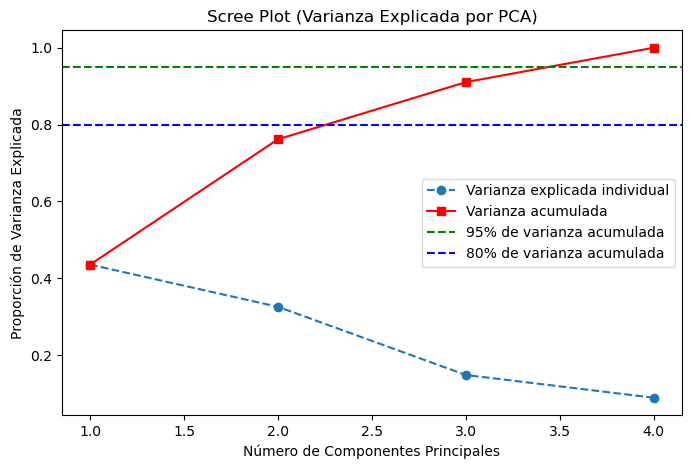

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables numéricas
variables = ['Age', 'Family', 'Pclass', 'Fare']
titanic_selected = titanic[variables]

# Escalar las variables antes de aplicar PCA
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Aplicar PCA sin limitar el número de componentes
pca = PCA()
pca_components = pca.fit_transform(titanic_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(explained_variance)

# Mostrar la varianza explicada
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.4f}")

print("\nVarianza explicada acumulada:")
for i, var in enumerate(varianza_acumulada):
    print(f"Hasta el componente {i+1}: {var:.4f}")

# 📊 Scree Plot (Gráfico de Codo)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', label="Varianza explicada individual")
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='s', linestyle='-', label="Varianza acumulada", color='r')
plt.axhline(y=0.95, color='g', linestyle='--', label="95% de varianza acumulada")
plt.axhline(y=0.8, color='b', linestyle='--', label="80% de varianza acumulada")

plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Scree Plot (Varianza Explicada por PCA)')
plt.legend()
plt.show()

Vemos la varianza explicada por cada componente y luego la varianza acumulada:
- El componente 1 muestra el 44% de los datos.
- El componente 2 muestra el 76% de los datos.
- El componente 3 muestra el 91% de los datos.
- El componente 4 muestra el 100% de los datos.

Con esta información podemos tomar una decisión, puesto que nos demuestra con cuantos componentes mantenemos la integridad de nuestros datos y no perdemos tanta información. Decidimos usar 3 componentes.

In [121]:
# Aplicar PCA con el número seleccionado de componentes
pca = PCA(n_components=3)
titanic_pca = pca.fit_transform(titanic_scaled)  # Transformar los datos correctamente

# Convertir los componentes principales en un DataFrame
titanic_pca_df = pd.DataFrame(titanic_pca, columns=[f'PC{i+1}' for i in range(3)])

# Mostrar las primeras filas del DataFrame corregido
print(titanic_pca_df.head())

        PC1       PC2       PC3
0  1.105046  0.022766 -0.050664
1 -1.794045  0.195368 -0.020732
2  0.901196 -0.576154 -0.240428
3 -1.485582  0.129701 -0.059684
4  0.577450 -0.884474  0.219965


Lo que nos muestra nuestro análisis es lo siguiente:

 - En las filas tenemos los 5 primeros pasajeros transformados en el espacio de nuevos componentes. 
 - En las columnas tenemos los 3 componentes utilizados, que representan las combinaciones lineales de las variables originales.
 - Los valores son coordenadas de cada pasajero en el nuevo espacio PCA. 
 - Un alto valor, ya sea negativo o positivo, indica una fuerte influencia de ese componente. Negativo no significa malo.

A continuación, realizaremos un scatter plot para graficar cada uno de los componentes. 

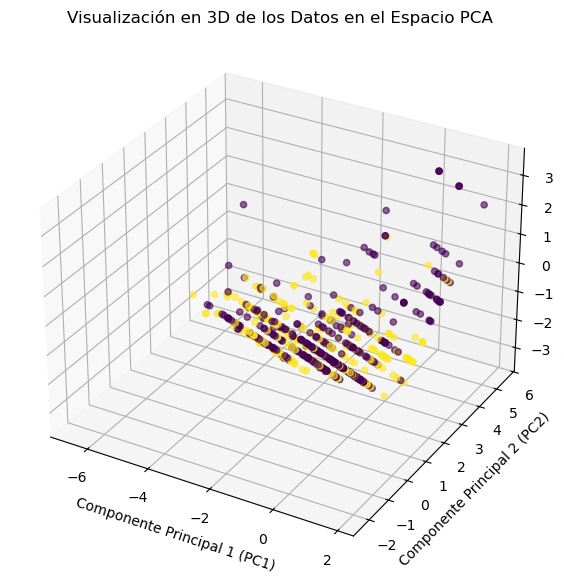

In [122]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y ejes 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
sc = ax.scatter(
    titanic_pca_df['PC1'], 
    titanic_pca_df['PC2'], 
    titanic_pca_df['PC3'],
    c=titanic['Survived'],  # Colorear según supervivencia
    cmap='viridis',  # Usar una escala de colores (puedes probar 'viridis', 'plasma', etc.)
    alpha=0.6
)

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1 (PC1)')
ax.set_ylabel('Componente Principal 2 (PC2)')
ax.set_zlabel('Componente Principal 3 (PC3)')
ax.set_title('Visualización en 3D de los Datos en el Espacio PCA')

# Mostrar el gráfico
plt.show()

Como se puede observar, no hay una separación marcada de los resultados lo que parece indicar que el método PCA no está funcionando bien o no sirve para identificar patrones en nuestros datos. De todas maneras, realizaremos una evaluación de nuestros modelos para revisar si estas observaciones son o no útiles.

In [123]:

# Unimos los dataframes mediante un 'concat'.
df_correlacion = pd.concat([titanic_pca_df, titanic_selected], axis=1)

# Calculamos la matriz de correlación usando la función '.corr()'
matriz_correlacion = df_correlacion.corr()

# Extraer solo la correlación de PC1, PC2 y PC3 con Age, Family, Pclass y Fare
matriz_correlacion_pca = matriz_correlacion.loc[titanic_pca_df.columns, titanic_selected.columns]

# Mostrar la matriz de correlación
print(matriz_correlacion_pca)

          Age    Family    Pclass      Fare
PC1 -0.638917  0.113088  0.892613 -0.724894
PC2 -0.530530  0.861157 -0.061194  0.526599
PC3  0.533857  0.485552  0.124284 -0.241749


## 📊 Matriz de Cargas de los Componentes Principales

Esta tabla muestra cómo cada variable original contribuye a los componentes principales (PC). Un valor alto (positivo o negativo) indica una fuerte influencia de esa variable en el componente correspondiente.

| Componente | Age   | Family | Pclass | Fare  |
|------------|--------|--------|--------|--------|
| **PC1** | -0.638254 |  0.112349  |  0.892350  | -0.725666 |
| **PC2** | -0.530793 |  0.861411  | -0.060716  |  0.525559 |
| **PC3** |  0.534797 |  0.485049  |  0.126003  | -0.240334 |
| **PC4** |  0.157743 | -0.100378  |  0.429125  |  0.373412 |

###  **Interpretación**
- **PC1:** Está fuertemente influenciado por **Pclass (0.89)** y **Fare (-0.73)**, lo que sugiere que captura información sobre la **clase socioeconómica del pasajero y el costo del boleto**.
- **PC2:** Principalmente influenciado por **Family (0.86)** y **Fare (0.53)**, lo que puede representar el **tamaño del grupo familiar y el impacto en la tarifa**.
- **PC3:** Destaca **Age (0.53)** y **Family (0.48)**, sugiriendo que este componente captura diferencias entre **jóvenes y mayores en relación con su grupo familiar**.
- **PC4:** Tiene una influencia moderada de **Pclass (0.43)** y **Fare (0.37)**, lo que podría estar relacionado con variaciones adicionales en la estructura de costos y clases.

**Conclusión:**  
Cada componente captura diferentes aspectos de los pasajeros. **PC1 parece estar relacionado con la clase social y la tarifa**, **PC2 con la estructura familiar**, **PC3 con la edad y el grupo familiar**, y **PC4 con factores adicionales de clase y costos**. Estos factores pueden ser clave para predecir la supervivencia en el Titanic.

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Asegurar que 'Survived' está en el dataset PCA
titanic_pca_df['Survived'] = titanic['Survived']

# Función para dividir los datos
def split_data(df, target, test_size=0.3, random_state=42):
    X = df.drop(columns=[target])  # Eliminar la variable objetivo
    y = df[target]  # Variable objetivo
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Definir los datos de entrada con PCA
X_train, X_test, y_train, y_test = split_data(titanic_pca_df[['PC1', 'PC2', 'PC3', 'Survived']], 'Survived')

# Modelos de Machine Learning (Corrección: Se reemplaza Decision Tree por KNN)
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier()
}

# Función para entrenar y evaluar modelos con las métricas estandarizadas
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Probabilidades para AUC-ROC

        # Guardar métricas
        results[name] = {
            "Precisión": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-score": f1_score(y_test, y_pred),
            "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        }

        # Mostrar métricas de clasificación completas
        print(f"\n Modelo: {name}")
        print(classification_report(y_test, y_pred))

    return results

# Convertir resultados en DataFrame para mejor visualización
results_pca_df = pd.DataFrame(results_pca).T

# Mostrar Resultados en tabla
print("\nComparación de Métricas de Modelos PCA:")
print(results_pca_df)


Comparación de Métricas de Modelos PCA:
                     Precisión    Recall  F1-score   AUC-ROC
Logistic Regression   0.836364  0.414414  0.554217  0.807626
KNN                   0.650000  0.585586  0.616114  0.743903
Random Forest         0.611650  0.567568  0.588785  0.728410


### Comparación de Resultados Antes y Después de PCA

#### Comparación de Resultados - Modelos con y sin PCA

#### Tabla Comparativa

| Modelo                | Precisión (Antes) | Precisión (PCA) | Recall (Antes) | Recall (PCA) | F1-score (Antes) | F1-score (PCA) | AUC-ROC (Antes) | AUC-ROC (PCA) |
|----------------------|------------------|----------------|----------------|--------------|------------------|----------------|----------------|--------------|
| **Logistic Regression** | 0.8321         | 0.8364         | 0.8321         | 0.4144       | 0.8320           | 0.5542         | 0.8989         | 0.8076       |
| **KNN**             | 0.8284           | 0.6500         | 0.8284         | 0.5856       | 0.8266           | 0.6161         | 0.8563         | 0.7439       |
| **Random Forest**    | 0.8284           | 0.6117         | 0.8284         | 0.5676       | 0.8254           | 0.5888         | 0.8817         | 0.7284       |

---

### **Análisis de los Resultados**

1. **Impacto Negativo en Recall**  
   - Todos los modelos han sufrido una **reducción en el Recall** al usar PCA.  
   - **Logistic Regression perdió más de la mitad de su recall (-0.4177)**, lo que indica que está identificando menos casos positivos.  
   - **KNN y Random Forest también bajaron en Recall, aunque en menor medida**.

2. **La Precisión se mantiene o baja**  
   - Logistic Regression **mejoró ligeramente en precisión (+0.0043)**, pero a costa de perder recall.  
   - KNN y Random Forest **perdieron bastante precisión**, lo que sugiere que la reducción de dimensionalidad ha afectado su capacidad de generalización.

3. **F1-score ha disminuido**  
   - Como resultado de la caída en recall, los F1-score también bajaron en todos los modelos.  
   - **Logistic Regression muestra la mayor caída (-0.2778), lo que sugiere que su balance entre precisión y recall se ha visto afectado negativamente**.

4. **AUC-ROC disminuyó en todos los modelos**  
   - La capacidad de los modelos para diferenciar entre clases ha **bajado en todos los casos**.  
   - **Logistic Regression fue el más afectado (-0.0913), lo que sugiere que perdió su ventaja en discriminación entre clases**.  
   - **KNN y Random Forest también bajaron en AUC-ROC, aunque en menor medida**.

---

### **Conclusión**
- El uso de PCA con 3 componentes ha afectado negativamente el rendimiento de los modelos.  
- Logistic Regression sufrió la mayor caída**, con una **drástica reducción en recall y AUC-ROC**.  
- KNN y Random Forest también empeoraron, aunque siguen funcionando relativamente bien en comparación.  
- Parece que la reducción de dimensionalidad ha eliminado información útil para la clasificación.
- No usaremos reducción de dimensionalidad en nuestro trabajo.
---

# **6.** Ajustes de Hiperparámetros.

Utilizamos método "GridSearch" revisado en clases

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Eliminar columnas no numéricas
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_test = X_test.select_dtypes(include=['float64', 'int64'])

# Definir el grid de hiperparámetros para cada modelo
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [200, 500, 1000]  # 🔹 Aumentamos el número de iteraciones
}

# Modelos
models = {
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'Regresión Logística': (LogisticRegression(max_iter=200, random_state=42), param_grid_lr)
}

# Ajuste de hiperparámetros con GridSearchCV
best_models = {}

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)  # X_train ya no tiene columnas categóricas
    best_models[name] = grid_search.best_estimator_
    print(f"\nMejor modelo para {name}:")
    print(grid_search.best_params_)


Mejor modelo para KNN:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing


Mejor modelo para Random Forest:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Mejor modelo para Regresión Logística:
{'C': 0.1, 'max_iter': 200, 'solver': 'lbfgs'}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
